In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import stop_words

from nltk.tokenize import sent_tokenize, word_tokenize

import os, sys
from glob import glob
import numpy as np
import gc 

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def preprocess(raw_text):
    # tokenize
    tokens = word_tokenize(raw_text)    

    # drop to lowercase
    tokens = [word.lower() for word in tokens]
        
    # *step two* (default): remove non-alpha characters,
    # punctuation, and as many other "noise" elements as
    # possible. If dealing with a single character word,    
    # drop non-alphabetical characters. This will remove 
    # most punctuation but preserve many words containing
    # marks such as the '-' in 'self-emancipated'

    tmp_text=list()

    for word in tokens:
        if len(word) == 1:
            if word.isalpha == True:
                tmp_text.append(word)
        else:
             tmp_text.append(word)           
    tokens = tmp_text

    # now remove leading and trailing quotation marks,      
    # hyphens and  dashes
    tmp_text=list()
    drop_list = ['“','"','”','-','—']
    for i, word in enumerate(tokens):
        if word[0] in drop_list:
            word = word[1:]
        if word[-1:] in drop_list:
            word = word[:-1]
        
        word = word.replace("gyftis", "gifts")
        word = word.replace("gether", "gather")
        word = word.replace("spirituall", "spiritual")
        word = word.replace("feythfull", "faith")
        word = word.replace("wytnes", "witness")
        word = word.replace("almes", "alms")
        word = word.replace("desyre", "desire")
        word = word.replace("selfe", "self")
        word = word.replace("saffely", "safely")
        word = word.replace("realme", "realm")
        word = word.replace("acte", "act")
        word = word.replace("fourme", "form")
        word = word.replace("subiectes", "subjects")
        word = word.replace("theyr", "their")
        word = word.replace("kynde", "kind")
        word = word.replace("kynge", "king")
        word = word.replace("kyndes", "kinds")
        word = word.replace("vpon", "unto")
        word = word.replace("purueyours", "purveyors")
        word = word.replace("highnes", "highness")
        word = word.replace("euery", "every")
        word = word.replace("quene", "queen")
        word = word.replace("quenes", "queens")
        word = word.replace("whiche", "which")
        word = word.replace("bloude", "blood")
        word = word.replace("soueraine", "sovereign")
        
        if word.isdigit():
            word = ""
        
        # catch any zero-length words remaining
        if len(word) > 0:
            tmp_text.append(word)
        
    return(tmp_text)

In [5]:
import gzip

ccp_models = dict()

input_texts = ["../vtexts/varded(50%) - Changes Unmarked/henry/henry.gz",
              "../vtexts/varded(50%) - Changes Unmarked/edward/edward.gz",
              "../vtexts/varded(50%) - Changes Unmarked/mary/mary.gz",
              "../vtexts/varded(50%) - Changes Unmarked/elizabeth/elizabeth.gz",
              "../vtexts/varded(50%) - Changes Unmarked/james/james.gz",
              "../vtexts/varded(50%) - Changes Unmarked/charles/charles.gz"]

# setup vectorizer and process text

for fp in input_texts:
    
    model_name = os.path.basename(fp).split(".")[0]
    print("starting: {0}".format(model_name))

    print("loading gzipped texts...")
    raw_text = gzip.open(fp,'rt').read()
    
    print("preprocessing...")
    tokens = preprocess(raw_text)

    # simulate documents
    print("segmenting...")
    collection = list()
    segment_length = int(len(tokens)/1000)
    
    for j in range(1000):
        segment = tokens[segment_length*j:segment_length*(j+1)]
        collection.append(' '.join(segment))
        
    # free up memory
    del raw_text
    gc.collect()
    
    vec = CountVectorizer(input='content',
                      min_df=2,
                      stop_words = [",","the","and","of","or","to","in","shall","be","that","any","by",".",
              "such","as","this","for","same","all","said","other","'s",";",
              "her","is","every","[","]","they","within", "our", "not", "so",
              "made", "no", "then", ":", "do", "from", "if", "it", "which", "at", "with",
             "thereof","upon", "a", "because", "used", "some", "but", "aforesaid", "also",
             ")","(", "what", "&", "may", "are", "their", "them", "sayde", "suche", "shalbe", "anye", "sayd",
             "thesaid", "/", "...", "/", "either", "haue", "vnto", "thy", "did", "was", "were", "have", "thee", 
             "your", "thou", "unto", "hath", "had", "went", "has", "his", "an","does", "who", "most", "up","on",
                                   "would", "those", "much"],
                      lowercase=True)

    # train model (LDA)
    counts = vec.fit_transform(collection)
    dc, vc = counts.shape
    print("read {0} documents with {1} vocabulary".format(dc,vc))
    
    # Build the LDA Model
    # n_components = number of topics to extract (if topics are too similar, extract more)
 
    ccp_model = LatentDirichletAllocation(n_components=2,
                                            max_iter=5,
                                            learning_method='batch',
                                            random_state=1)
    ccp_models[model_name] = [ccp_model, counts, vec, collection]    

starting: henry
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 1879 vocabulary
starting: edward
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 6290 vocabulary
starting: mary
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 417 vocabulary
starting: elizabeth
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 13015 vocabulary
starting: james
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 9194 vocabulary
starting: charles
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 2001 vocabulary


henry:

Topic #0:
he king thomist him should you henry more one church men scripture luther must me say my faith god against words than therefore lord like book nor ye us when nothing will how scriptures bread water before there can christ sacrament own thomists out things matter great being wine mass am place been these without where man saint grace paul very thomas now first argument time we into says lies defender after england himself ambrose gospel unity priest priests rod alone usage able here sacraments ever articles well called wish use way none second given call although merely even foolish 

Topic #1:
he my god will you we me christ king can these good let faith only men even church against man should one him things there words us when now nothing make say scripture therefore body here thomist work see word its time right henry thing both how concerning than believe defender bread authority mass lord world into after set whole been book sacrament nor truth own prove people am

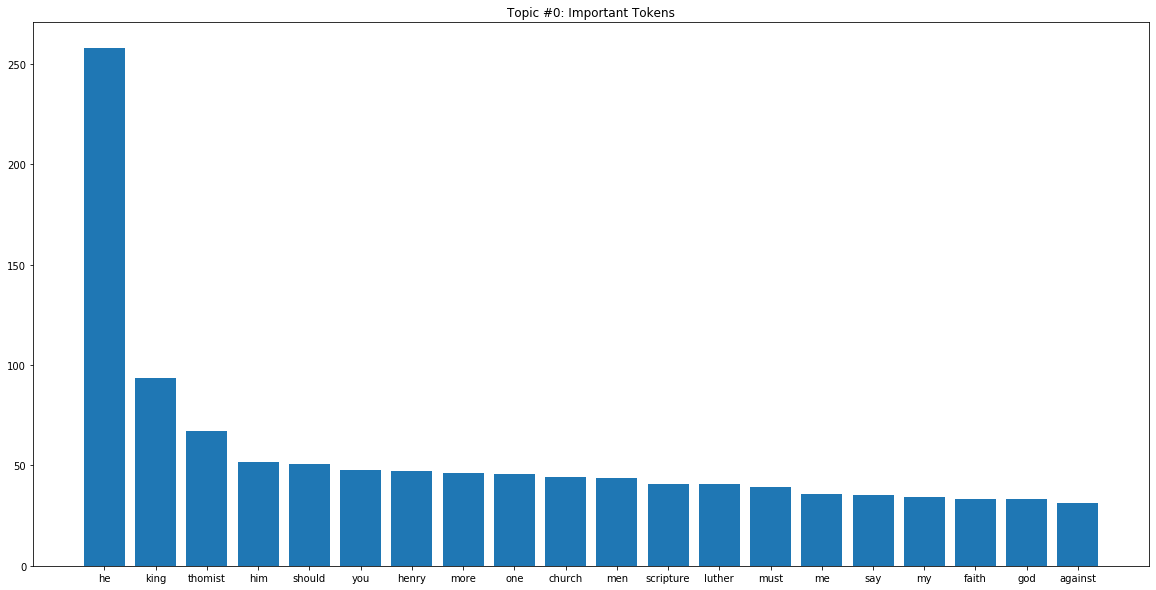

          Topic 0  Topic 1  Dominant Topic
Text 0      0.969    0.031               0
Text 1      0.947    0.053               0
Text 2      0.967    0.033               0
Text 3      0.965    0.035               0
Text 4      0.966    0.034               0
...           ...      ...             ...
Text 995    0.957    0.043               0
Text 996    0.646    0.354               0
Text 997    0.039    0.961               1
Text 998    0.513    0.487               0
Text 999    0.579    0.421               0

[1000 rows x 3 columns]
edward:

Topic #0:
sir he funeral lord john see st ibid thomas london william lady vol will died king been church master buried there son one queen stowe ms earl first henry him edward wife diary daughter day three arms ii after where harl mayor two before mr name death mary married found item knight duke sheriff elizabeth we alderman these printed robert history she richard parish strype father year pp iii you when afterwards great second resident notes 

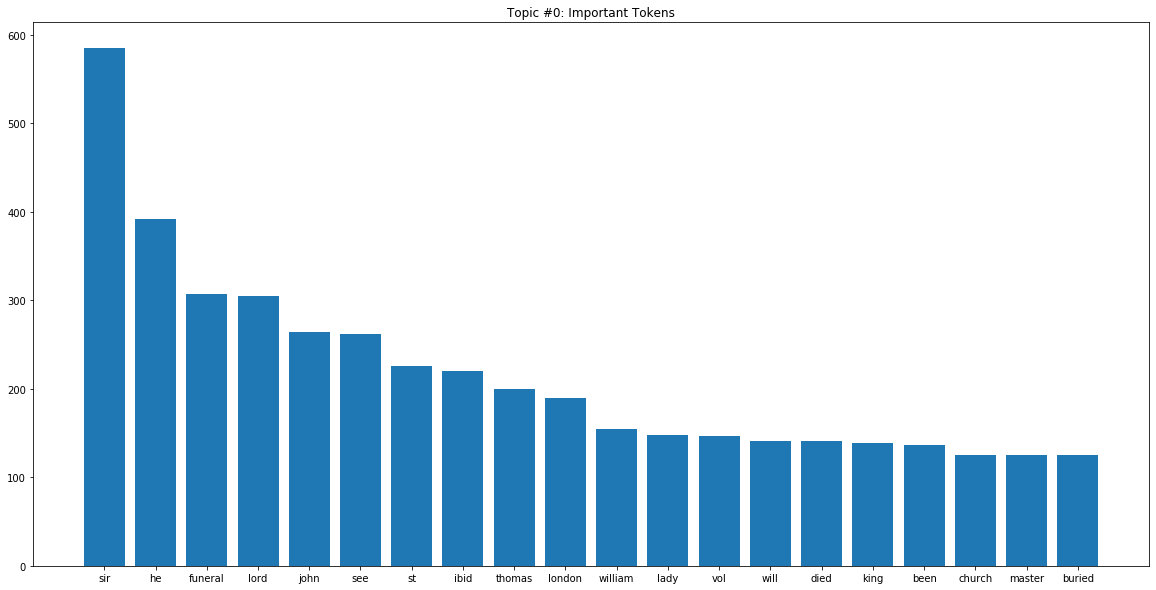

          Topic 0  Topic 1  Dominant Topic
Text 0      0.969    0.031               0
Text 1      0.947    0.053               0
Text 2      0.967    0.033               0
Text 3      0.965    0.035               0
Text 4      0.966    0.034               0
...           ...      ...             ...
Text 995    0.957    0.043               0
Text 996    0.646    0.354               0
Text 997    0.039    0.961               1
Text 998    0.513    0.487               0
Text 999    0.579    0.421               0

[1000 rows x 3 columns]
mary:

Topic #0:
subjects persons king person being authority after day highnesss kind queens laws lambs calves wethers beaus deputies butter chease should purveyors well there salt bakon further enactd grain connies good fish set people religion queen ought according jackman next before swine deputy england majesties majesty him estatutes both only edward like taken pigs vessels barrels forth ireland lady might dominions doing whereby yet several diverse

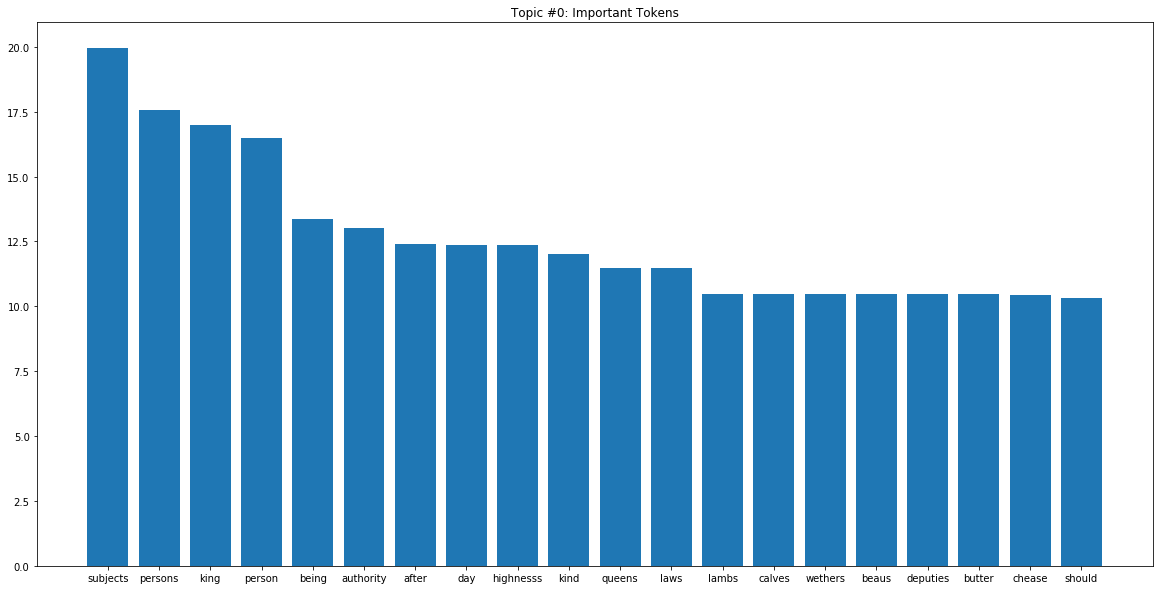

          Topic 0  Topic 1  Dominant Topic
Text 0      0.969    0.031               0
Text 1      0.947    0.053               0
Text 2      0.967    0.033               0
Text 3      0.965    0.035               0
Text 4      0.966    0.034               0
...           ...      ...             ...
Text 995    0.957    0.043               0
Text 996    0.646    0.354               0
Text 997    0.039    0.961               1
Text 998    0.513    0.487               0
Text 999    0.579    0.421               0

[1000 rows x 3 columns]
elizabeth:

Topic #0:
we god church he men things christ there one us should man doth only these law than when being more him yet can will therefore thing laws good been own how scripture faith page cause many reason without even out against themselves time before say must might et after very world nor authority himself you both now make like truth nature holy rome neither think ye use concerning saith whom where word great way ceremonies life see people 

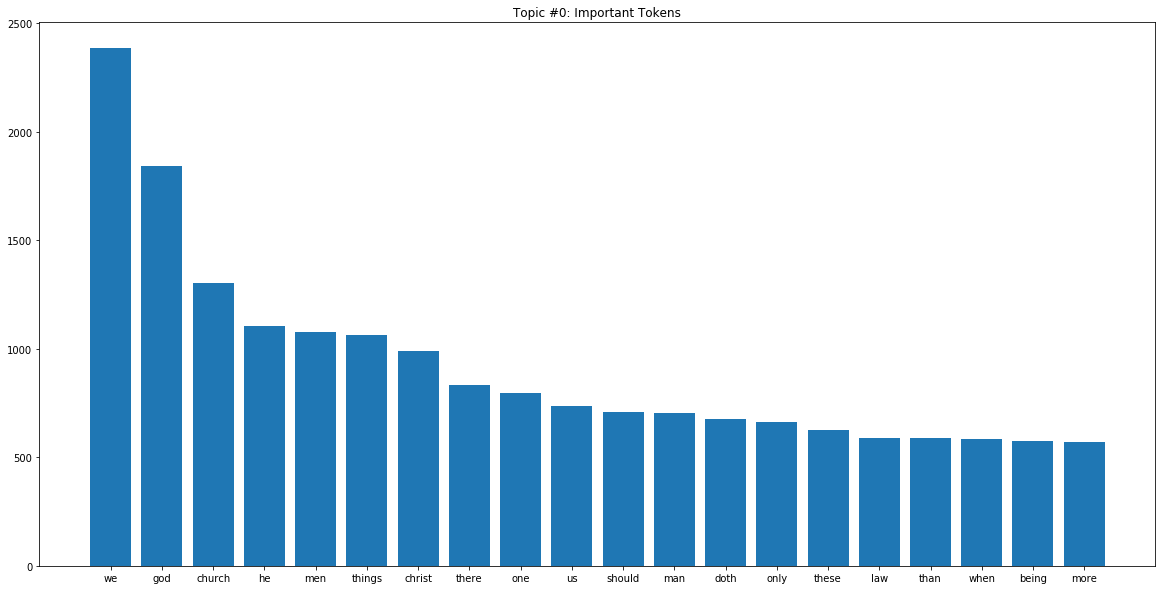

          Topic 0  Topic 1  Dominant Topic
Text 0      0.969    0.031               0
Text 1      0.947    0.053               0
Text 2      0.967    0.033               0
Text 3      0.965    0.035               0
Text 4      0.966    0.034               0
...           ...      ...             ...
Text 995    0.957    0.043               0
Text 996    0.646    0.354               0
Text 997    0.039    0.961               1
Text 998    0.513    0.487               0
Text 999    0.579    0.421               0

[1000 rows x 3 columns]
james:

Topic #0:
lord he will god my israel him ye me king out people land children house son before shalt day when against 10 there you one sons into come came 11 12 13 even hand man 15 14 go 16 saith let us make moses behold saying judah men we jerusalem 17 offering 18 hast over these earth name after therefore according 19 thus 20 now brought days two thine 21 among 23 great put egypt down 22 give hundred city forth take bring 25 she 24 neither set pa

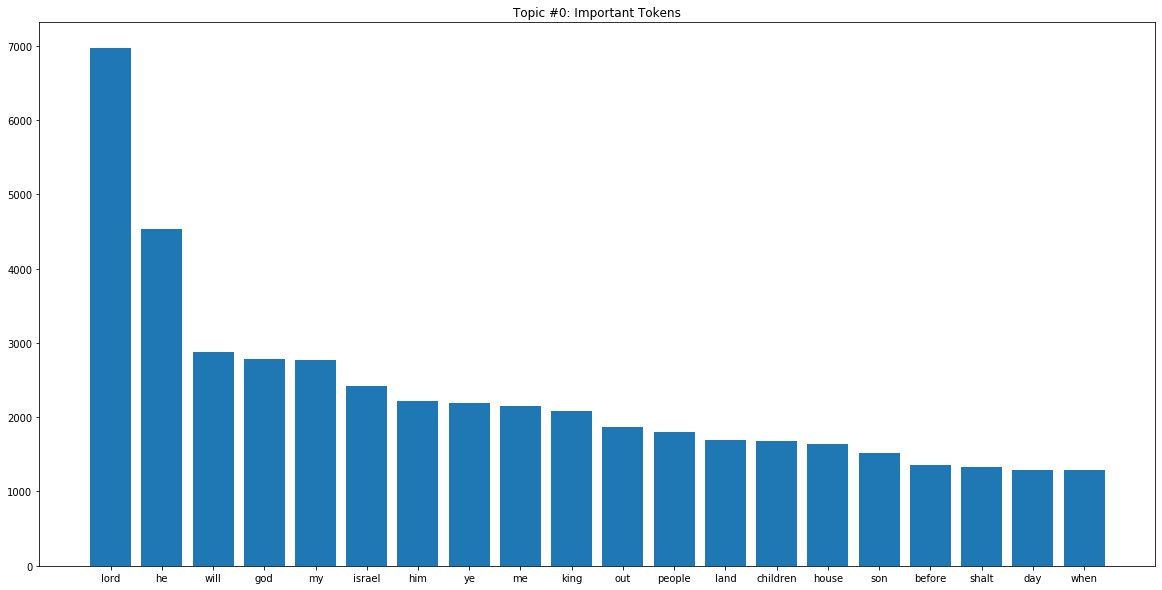

          Topic 0  Topic 1  Dominant Topic
Text 0      0.969    0.031               0
Text 1      0.947    0.053               0
Text 2      0.967    0.033               0
Text 3      0.965    0.035               0
Text 4      0.966    0.034               0
...           ...      ...             ...
Text 995    0.957    0.043               0
Text 996    0.646    0.354               0
Text 997    0.039    0.961               1
Text 998    0.513    0.487               0
Text 999    0.579    0.421               0

[1000 rows x 3 columns]
charles:

Topic #0:
god he we christ us holy lord him one you father jesus people will church only priest there men good son day word life sins man own these through come body many yet whom therefore communion give world say more can should let glory both when after time sacrament almighty sin take himself death mercy power before make heaven against receive blood into true being she doth name according nor great blessed under kingdom here faith things ou

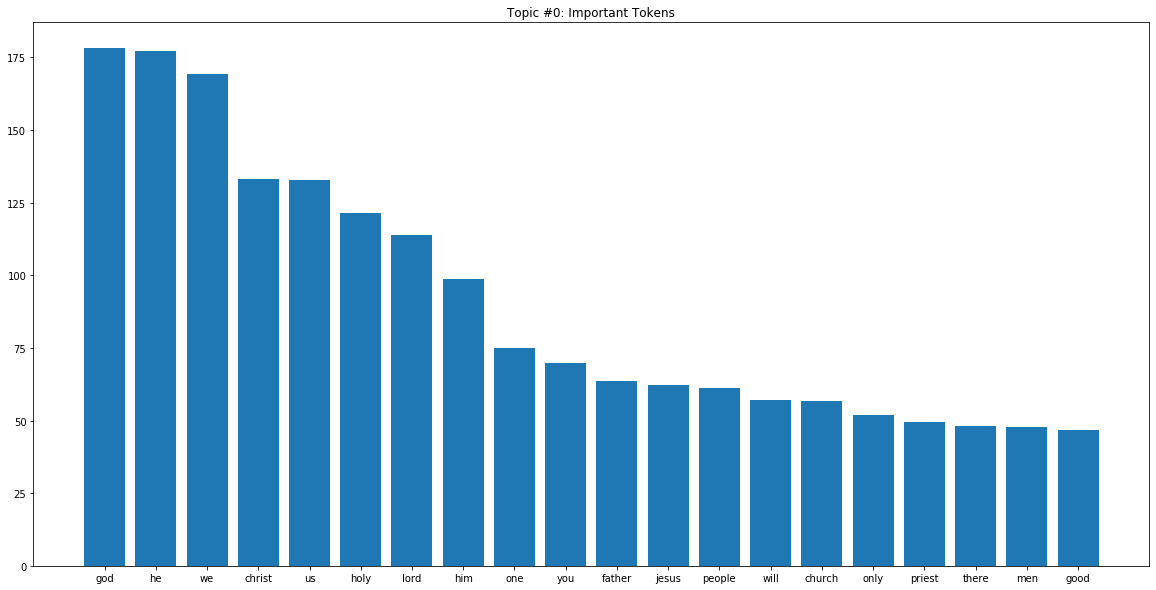

          Topic 0  Topic 1  Dominant Topic
Text 0      0.969    0.031               0
Text 1      0.947    0.053               0
Text 2      0.967    0.033               0
Text 3      0.965    0.035               0
Text 4      0.966    0.034               0
...           ...      ...             ...
Text 995    0.957    0.043               0
Text 996    0.646    0.354               0
Text 997    0.039    0.961               1
Text 998    0.513    0.487               0
Text 999    0.579    0.421               0

[1000 rows x 3 columns]


In [6]:
for ccp_model_name in ccp_models:
    # get fitted data and transformed matrix
    ccp_data = ccp_models[ccp_model_name][0].fit(ccp_models[ccp_model_name][1])

    # extract the features to a simple list
    feature_names = ccp_models[ccp_model_name][2].get_feature_names()

    # how many words do we want to extract for each topic?
    n_words = 100
    
    print(ccp_model_name+":\n")
    # now produce topics
    for topic_idx, topic in enumerate(ccp_models[ccp_model_name][0].components_):
        print("Topic #%d:" % topic_idx)
        for i in topic.argsort()[:-n_words - 1:-1]:
            print("{0} ".format(feature_names[i]),end="")
        print("\n")
        
        # plot the words from the first topic
    data = ccp_models[ccp_model_name][0].components_[0]
    word_index = data.argsort()[:-20 - 1:-1]

    x = [feature_names[x] for x in word_index]
    y = [data[x] for x in word_index]

    plt.figure(figsize=(20,10))
    plt.title("Topic #0: Important Tokens")

    plt.xlabel("")
    plt.ylabel("")
    plt.bar(x,y)
    plt.show()

    ccp_transformed_data = ccp_models[ccp_model_name][0].fit_transform(counts)

    # make lists of topics and texts for labels
    topics = ["Topic " + str(i) for i in range(ccp_models[ccp_model_name][0].n_components)]
    texts = ["Text " + str(i) for i in range(len(ccp_models[ccp_model_name][3]))]

    # put data into a special datatype called a Pandas DataFrame
    topic_chart = pd.DataFrame(np.round(ccp_transformed_data, 3), columns=topics, index=texts)
    
    ccp_models[ccp_model_name].append(topic_chart)

    # extract the most dominant topic by searching for largest value
    topic_chart['Dominant Topic'] = np.argmax(topic_chart.values, axis=1)

    # Display
    print(topic_chart)